In [192]:
#Der ist noch mals Kopiert um die Ergebnisse auch hier festzuhalten
#Sie können bis nach ganz unten scrollen dort wird dann der MSE und der MAE sein und sogar noch eine Grafik
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#3.2
#Ebenso habe ich auch noch das von google entwickelte Plattform Tensorflow genommen
#Das "Sequential" im Tensorflow ermöglicht es mir neuronale Netze sequenziell zu stapeln.
#Dense ist eine klasse die eine schicht ein neuronales Netzwerk definiert
#Dropout ist eine Technik zur Regulierung von neuronalen Netzen
#(Der rest folgt dann bei der implementierung)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [193]:
#Ich habe mich entschieden das ich für meine Berechnungen die Spalten 'Date', 'Unnamed: 0','4046','4225','4770','year','region nicht brauche
#Ebenso wollte ich nicht das er mir eine Kopie gibt sondern es soll direkt verändert werden.
df=pd.read_csv("avocado.csv")
df.drop(['Date','number','4046','4225','4770','year','region'], axis=1,inplace=True)
df

,AveragePrice,TotalVolume,TotalBags,SmallBags,LargeBags,XLargeBags,type
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional
...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic


In [194]:
# Hier habe ich noch den 'type' zu einer nummer konvertiert
one_hot_encoder = OneHotEncoder()
type_encoded = one_hot_encoder.fit_transform(df[['type']])
type_encoded = pd.DataFrame(type_encoded.toarray(), columns=['conventional','organic'])
df_encoded = pd.concat([df, type_encoded], axis=1)
df_encoded = df_encoded.drop(['type'], axis=1)

In [195]:
df_encoded

,AveragePrice,TotalVolume,TotalBags,SmallBags,LargeBags,XLargeBags,conventional,organic
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,1.0,0.0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,1.0,0.0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,1.0,0.0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,1.0,0.0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,0.0,1.0
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,0.0,1.0
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,0.0,1.0
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,0.0,1.0


In [196]:
#Hier habe ich das Datenset in training und testing eingeteilt
X = df_encoded.drop(['AveragePrice'], axis=1)
y = df_encoded['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical variables using StandardScaler
#Hier habe ich die numerischen Merkmale der Trainings- und Testdatensätze skaliert mithilfe von StandartScaler
numeric_transformer = StandardScaler()
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
ct = ColumnTransformer([('numeric', numeric_transformer, numeric_features)], remainder='passthrough')
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [197]:
#Neuronale Netzwerk architektur definieren
#Habe habe das Neuronale Netzwerk von Tensorflow genommen, da ich das einfacher finde und mit dem Neuronalen Netzwerk auf sklearn sehr Probleme hatte.
#Es hatte viele gute Turtorials dazu und uch habe gehört es besser ist als das von sklearn.
#Ebenso war es auch sehr einfach zu implementieren und zu konfigurieren.
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Kompiliert das Modell und eine Zusammenfassung des Modells
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               1024      
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


In [198]:
#Das Model Trainieren
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=2)


Epoch 1/50
457/457 - 2s - loss: 0.1825 - mae: 0.3132 - 2s/epoch - 5ms/step
Epoch 2/50
457/457 - 1s - loss: 0.1285 - mae: 0.2759 - 1s/epoch - 2ms/step
Epoch 3/50
457/457 - 1s - loss: 0.1176 - mae: 0.2633 - 1s/epoch - 2ms/step
Epoch 4/50
457/457 - 1s - loss: 0.1119 - mae: 0.2581 - 1s/epoch - 2ms/step
Epoch 5/50
457/457 - 1s - loss: 0.1087 - mae: 0.2537 - 1s/epoch - 2ms/step
Epoch 6/50
457/457 - 1s - loss: 0.1051 - mae: 0.2491 - 1s/epoch - 2ms/step
Epoch 7/50
457/457 - 1s - loss: 0.1054 - mae: 0.2493 - 1s/epoch - 2ms/step
Epoch 8/50
457/457 - 1s - loss: 0.1013 - mae: 0.2437 - 1s/epoch - 3ms/step
Epoch 9/50
457/457 - 1s - loss: 0.0990 - mae: 0.2408 - 1s/epoch - 2ms/step
Epoch 10/50
457/457 - 1s - loss: 0.0993 - mae: 0.2404 - 1s/epoch - 2ms/step
Epoch 11/50
457/457 - 1s - loss: 0.0982 - mae: 0.2394 - 1s/epoch - 2ms/step
Epoch 12/50
457/457 - 1s - loss: 0.0968 - mae: 0.2372 - 1s/epoch - 2ms/step
Epoch 13/50
457/457 - 1s - loss: 0.0954 - mae: 0.2357 - 1s/epoch - 2ms/step
Epoch 14/50
457/457 -

In [199]:
# Das Model mit "X_test_scaled" und "y_test" trainieren
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32)


Epoch 1/50
457/457 [==============================] - 2s 4ms/step - loss: 0.0877 - mae: 0.2244 - val_loss: 0.0879 - val_mae: 0.2262
Epoch 2/50
457/457 [==============================] - 1s 3ms/step - loss: 0.0872 - mae: 0.2240 - val_loss: 0.0876 - val_mae: 0.2257
Epoch 3/50
457/457 [==============================] - 1s 3ms/step - loss: 0.0867 - mae: 0.2231 - val_loss: 0.0882 - val_mae: 0.2281
Epoch 4/50
457/457 [==============================] - 2s 4ms/step - loss: 0.0876 - mae: 0.2246 - val_loss: 0.0876 - val_mae: 0.2271
Epoch 5/50
457/457 [==============================] - 2s 4ms/step - loss: 0.0873 - mae: 0.2242 - val_loss: 0.0892 - val_mae: 0.2304
Epoch 6/50
457/457 [==============================] - 1s 3ms/step - loss: 0.0876 - mae: 0.2242 - val_loss: 0.0876 - val_mae: 0.2274
Epoch 7/50
457/457 [==============================] - 1s 3ms/step - loss: 0.0878 - mae: 0.2245 - val_loss: 0.0880 - val_mae: 0.2260
Epoch 8/50
457/457 [==============================] - 1s 3ms/step - loss: 0.

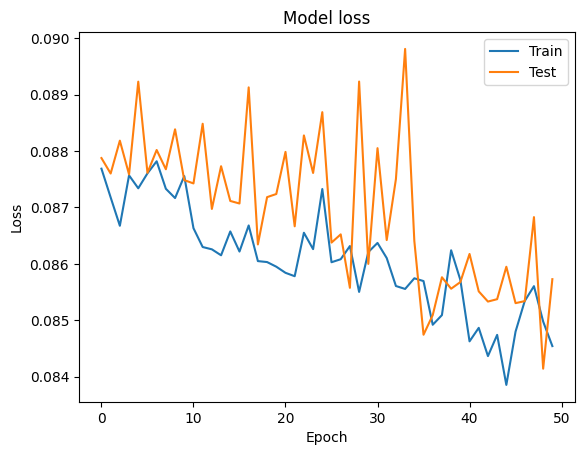

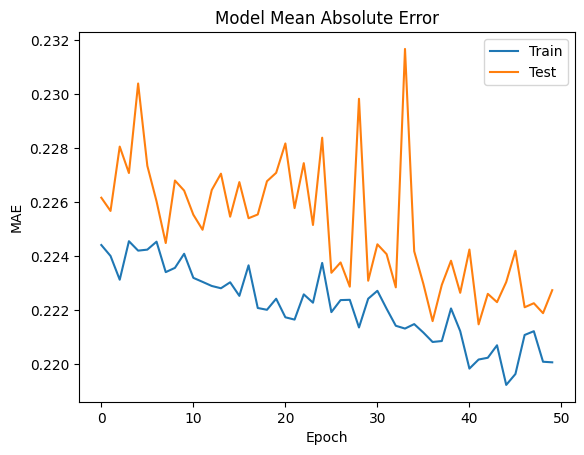

In [200]:
# Grafik für MAE und MSE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()





In [201]:
#3.3
#Modell auf dem Testdatensatz evaluiren
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test.to_numpy().reshape(-1), y_pred.reshape(-1))
mae = np.mean(np.abs(y_pred.reshape(-1) - y_test.to_numpy().reshape(-1)))

#4.2
print("MSE:", mse)
print("MAE:", mae)
#Die Ergebnisse zeigen, dass das Modell bei der Vorhersage der Testdaten eine relativ geringe mittlere quadratische Abweichung (MSE) von 0,085 aufweist,
#was darauf hinweist, dass es eine gute Genauigkeit aufweist.
#Ebenso zeigt das mittlere absolute Fehler (MAE) Ergebnis von 0,221, dass die Vorhersage des Modells im Durchschnitt um 0,221 Einheiten vom tatsächlichen Wert abweicht.
#Insgesamt scheint das Modell bei der Vorhersage der Testdaten gut abzuschneiden.

115/115 [==============================] - 0s 2ms/step
MSE: 0.0857290583487908
MAE: 0.22274622674445585


<Axes: >

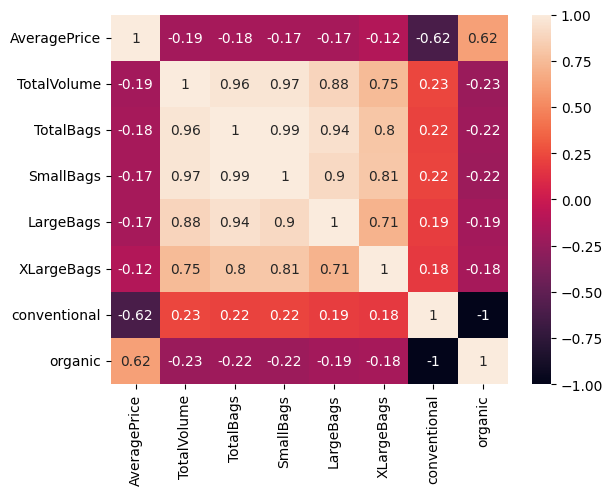

In [202]:
#4.1
import seaborn as sns

corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True)


In [203]:
#4.3
from sklearn.metrics import confusion_matrix
import numpy as np

threshold = 0.5

y_pred_binary = np.where(y_pred >= threshold, 1, 0)
y_test_binary = np.where(y_test >= threshold, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("True Positives: ", tp)
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
#Allerdings macht es keinen Sinn, eine Wahrheitsmatrix für ein neuronales Netz zu verwenden, wenn es sich um eine Regressionsaufgabe handelt, bei der das Modell den numerischen Wert einer kontinuierlichen Zielgröße vorhersagt.
#In diesem Fall ist die Verwendung von Bewertungsmetriken wie dem Mean Squared Error (MSE) oder Mean Absolute Error (MAE) angemessener, um die Leistung des Modells zu bewerten.

True Positives:  3649
True Negatives:  0
False Positives:  1
False Negatives:  0
Sensitivity:  1.0
Specificity:  0.0


4.4
Das Modell verwendet eine Sequenz von drei Schichten: zwei Dense-Schichten mit ReLU-Aktivierungsfunktionen und einer Dropout-Schicht zwischen ihnen und eine Dense-Schicht mit linearer Aktivierungsfunktion.
Es wurde mit dem Adam-Optimizer und Mean Squared Error (MSE) als Verlustfunktion kompiliert.
Während des Trainings wurde Mean Absolute Error (MAE) als Metrik verwendet.

Das Modell hat eine MSE von 0,085 und eine MAE von 0,222, dass heisst das Modell eine relativ gute Leistung zeigt.
Eine mögliche Hypothese könnte sein, dass die Dropout-Schicht dazu beigetragen hat, das Overfitting zu reduzieren und die Generalisierungsfähigkeit des Modells zu verbessern.
Eine weitere Hypothese könnte sein, dass die Verwendung von ReLU-Aktivierungsfunktionen zur besseren Modellierung von nicht-linearen Zusammenhängen in den Daten beigetragen hat.